In [2]:
import numpy as np    
from numpy.random import uniform, normal

x = np.array([1, 2, 3, 4]).T # a column vector n x 1
n = len(x) # (n - 1) features plus the constant gives n
w = np.array(uniform(size = n)).T # weights (random for now, between 0 and 1 for starters)
iyp = np.inner(x, w) # inner product of two arrays

xt = [ x.T ] # transpose into a row vector, 1 x n
yp = np.matmul(xt, w) # a scalar prediction, (1 x n) x (n x 1) = 1 x 1
assert iyp == yp # should coincide with the inner product from above

X = np.array([[1, 1, 1], # constants
              [3, 5, 7], # the first feature
              [8, 7, 3],
              [2, 4, 6]]) # n x p in total
assert n == np.shape(X)[0] # features as rows
p = np.shape(X)[1] # inputs as columns

# let assume the model is 3 x1 - 2 x2 + 4 x3 - 5 with small gaussian noise
def gen(x): # generate integer labels from an arbitrary model
    label = 5 * x[0] + 3 * x[1] - 2 * x[2] + 4 * x[3] \
                  + normal(loc = 0, scale = 0.2, size = 1)
    label = round(label[0])
    print(x, 'gets', label)
    return label
    
y = np.apply_along_axis(gen, axis = 0, arr = X) # 1 x p, one per input (rows)

def rss(X, y, w):
    Xt = X.T
    yp = np.matmul(Xt, w) # predictions for all inputs
    yyp = y - yp
    assert np.shape(yp) == np.shape(y)
    return np.matmul(yyp.T, yyp)

for r in range(10): # replicas
    wr = np.array(uniform(low = -6, high = 6, size = n)).T
    print(f'{rss(X, y, wr)} for {wr}') # the smaller the better (all will be horrible)

[1 3 8 2] gets 6
[1 5 7 4] gets 22
[1 7 3 6] gets 44
11542.187787001756 for [ 2.66519207  1.33592339 -5.83580509 -2.99401286]
845.2467804480767 for [-2.33010918 -0.42093477  0.14908032  3.64422383]
3410.9906834085023 for [-4.50961084  5.06205536 -0.7323033  -5.65070323]
2300.3435264927957 for [-3.19708811  4.20491111 -1.83281766 -2.28492754]
6893.231740280828 for [ 4.01343535 -5.60962614 -1.30389932  2.80240417]
8806.88995559034 for [ 2.80605953 -3.37262555  2.66400754 -4.90132176]
2476.9088473250663 for [-4.26478437  1.17730375  2.4675248  -2.45835636]
1920.424718083403 for [ 3.6479483   3.15260702 -3.09868129 -0.4159342 ]
13826.003858430167 for [ 2.75860969 -3.9697028  -5.71982962  1.98573075]
7506.895697530802 for [ 5.85895494 -3.68085285  4.8388295  -5.43772375]


In [3]:
from math import sqrt
from numpy import argmax
from random import random, randint

n = 20 # number of features
# possible labels 1, 2, 3
low = 1
high = 3

# generate 'labelled' data at random
N = 100 # amount of known data points
# a list of pairs (x, y)
known = []
for d in range(N):
    known.append(([random() for i in range(n)], randint(low, high)))

def dist(x1, x2): # using euclidean distance for simplicity
    return sqrt(sum([(xi - xj)**2 for (xi, xj) in zip(x1, x2)]))

x = [random() for i in range(n)] # our 'unknown' x

k = 3 # using three nearest neighbors
nd = [float('inf')] * k # their distances (infinite at first)
ny = [None] * k # the labels of the nearest neighbors

for (xn, yn) in known:
    d = dist(x, xn)
    i = argmax(nd)
    if d < nd[i]: # if smaller than the largest of the stored
        nd[i] = d # replace that distance
        ny[i] = yn # and that label

y = sum(ny) / k
xs = ' ' .join(['%.2f' % round(xi ,2) for xi in x])
print(f'[{xs}] is {round(y)}') # round to the closest label (a simple choice)

[0.79 0.77 0.94 0.27 0.42 0.41 0.06 0.52 0.47 0.41 0.33 0.99 0.29 0.77 0.68 0.12 0.82 0.68 0.41 0.17] is 2


In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def filtered_data(path):
    data_all = np.loadtxt(path)
    mask = np.in1d(data_all[:, 0], (2, 3))
    data_x = data_all[mask, 1: ]
    data_y = data_all[mask, 0]
    return data_x, data_y

train_x, train_y = filtered_data('/content/drive/MyDrive/Datasets/zip.train')
test_x, test_y = filtered_data('/content/drive/MyDrive/Datasets/zip.test')

k_points = [1, 3, 5, 7, 15]

In [5]:

print(train_x.shape)
print(np.max(train_x))
print(np.min(train_x))
print(np.unique(train_y))

(1389, 256)
1.0
-1.0
[2. 3.]


In [6]:
import numpy as np

from numpy.random import uniform, normal

x = train_y.T
n = len(x)
w = np.array(uniform(size = n)).T
iyp = np.inner(x, w)

xt = [ x.T ]
yp = np.matmul(xt, w)
assert iyp == yp

assert n == np.shape(train_x)[0]
p = np.shape(train_x)[1]

def gen(x): # generate integer labels from an arbitrary model
    label = 5 * x[0] + 3 * x[1] - 2 * x[2] + 4 * x[3] \
                  + normal(loc = 0, scale = 0.2, size = 1)
    label = round(label[0])
    print(x, 'gets', label)
    return label
    
y = np.apply_along_axis(gen, axis = 0, arr = train_x) # 1 x p, one per input (rows)

[-1. -1. -1. ... -1. -1. -1.] gets -9
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1.    -0.83  -1.    ... -0.988 -0.99  -0.783] gets -9
[-1.     0.442 -1.    ... -0.527  0.708 -0.984] gets -6
[-0.928  1.    -0.104 ... -0.208  0.557 -0.827] gets -5
[-0.204  1.     0.549 ...  0.62   0.347  0.068] gets 1
[ 0.751  0.479  0.579 ...  1.    -0.107  1.   ] gets 8
[ 0.466 -0.328  0.579 ...  0.467 -0.758  1.   ] gets 4
[ 0.234 -0.947  0.857 ...  0.396 -0.975  1.   ] gets 0
[-0.809 -1.     0.535 ... -0.343 -1.     0.837] gets -7
[-1.    -1.    -0.888 ... -1.    -1.    -0.057] gets -10
[-1.    -1.    -1.    ... -1.    -1.    -0.925] gets -10
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1. -1. -1. ... -1. -1. -1.] gets -10
[-1.    -1.    -1.    ... -1.    -1.    -0.668] gets -10
[-1.    -0.025 -1.    ... -0.339 -0.713  0.854] gets -7
[-0.37   0.519 -1.

In [7]:
def rss(X, y, w):
    Xt = X.T
    yp = np.matmul(Xt, w) # predictions for all inputs
    yyp = y - yp
    assert np.shape(yp) == np.shape(y)
    return np.matmul(yyp.T, yyp)

for r in range(10): # replicas
    wr = np.array(uniform(low = np.min(train_x), high = np.max(train_x), size = n)).T
    print(f'{rss(train_x, y, wr)} for {wr}') # the smaller the better (all will be horrible)

40557.04774845597 for [ 0.01373673  0.35283786  0.95795917 ... -0.98739325  0.02918001
  0.34272292]
74511.36289228559 for [-0.32688792  0.43008395  0.10400306 ... -0.76534172  0.27701524
 -0.75912433]
263954.39236815576 for [ 0.78619419 -0.98504959  0.53631594 ...  0.96649802 -0.83814536
  0.55290052]
102802.48088870174 for [-0.66344806 -0.22254305  0.81321544 ... -0.10368164  0.58186276
 -0.65261398]
105432.01613400245 for [-0.68194758 -0.68093952  0.91534519 ...  0.44966207  0.87995232
  0.43568389]
208583.83130261127 for [ 0.02768406  0.86849399 -0.239993   ...  0.98873367  0.55906706
 -0.37943322]
74597.15793847338 for [-0.2048041  -0.10198022 -0.99123745 ...  0.66258831 -0.29216693
 -0.06751107]
113045.0415338731 for [-0.39896641 -0.35707762  0.52717325 ... -0.75025464  0.30329192
 -0.86596274]
41765.16129626317 for [ 0.38606695 -0.09123053  0.29679727 ...  0.10091542 -0.15235842
  0.3798954 ]
194048.66591455566 for [-0.89188538  0.67091179 -0.41247646 ...  0.5558289  -0.97037928

In [8]:
print(train_x.shape)
print(np.max(train_x))
print(np.min(train_x))
print(np.unique(train_y))

(1389, 256)
1.0
-1.0
[2. 3.]


In [9]:
class LinearRegression:
  def fit(self, X, y):
    X = np.c_[np.ones((len(train_x), 1)), train_x]
    self.beta = np.linalg.lstsq(X, train_y, rcond = None)[0]
    return self
    
  def predict(self, x):
    return np.dot(self.beta, np.r_[1, x])

model = LinearRegression().fit(train_x, train_y)
print("beta = ", model.beta)

beta =  [ 2.35858425e+01 -2.88861437e-01  5.93022626e-02  2.40565969e-02
 -2.64356805e-02  1.16775415e-02  3.74923660e-03 -3.79483192e-03
 -3.58438231e-03 -1.36610358e-02  2.42559422e-02 -5.71717440e-02
  7.69621164e-02 -9.82394663e-03  1.73586415e-01 -2.10862950e-01
  2.12482973e+01 -5.65358597e-02 -5.52421959e-02  9.90591256e-03
 -3.08468051e-03  3.68977893e-03 -1.20769789e-02  5.07032401e-02
 -3.08258960e-02 -1.08705270e-02 -1.53272874e-04  4.24856619e-02
  3.74454934e-02 -2.43014712e-02 -7.05475222e-03 -3.00281362e-01
  8.52516002e-01 -1.07893201e-02 -2.29830021e-02  2.88215942e-02
  1.02645629e-02 -4.10299809e-02  8.16360126e-03  1.56134600e-03
 -2.09752763e-03  1.84995187e-02  4.56621375e-03  1.44598363e-03
 -2.67258325e-02 -1.84425240e-02 -4.64405386e-02  8.35415899e-02
  7.16212523e-02 -1.41997042e-02 -2.60343856e-02  1.75116661e-02
 -1.89609324e-02  1.51404964e-02  1.39744306e-02 -2.50378615e-02
  2.97363348e-02 -1.80383524e-03 -4.10168208e-02  2.75701433e-02
  4.68371565e-03 

In [10]:
def least_square_stds():
    X = np.c_[np.ones((len(train_x), 1)), train_x]
    beta = np.linalg.lstsq(X, train_y, rcond = None)[0]
    error = lambda x, y: (np.dot(np.array([1, *x]), beta) - y) ** 2

    train_stds = []
    test_stds = []

    for k in k_points:
        train_errors = [error(x, y) for (x, y) in zip(train_x, train_y)]
        train_stds.append(np.sqrt(np.mean(train_errors)))
        test_errors = [error(x, y) for (x, y) in zip(test_x, test_y)]
        test_stds.append(np.sqrt(np.mean(test_errors)))

    return train_stds, test_stds


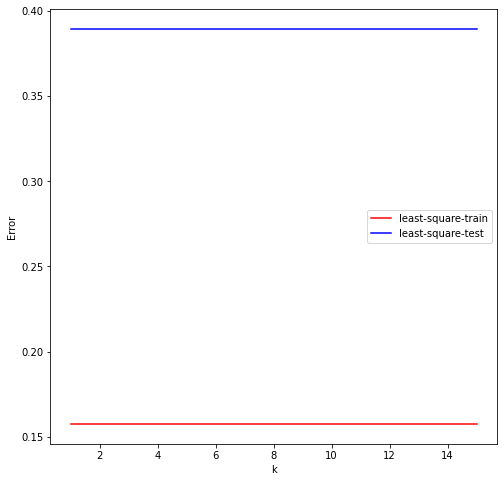

In [11]:
# least square plotting

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)

train_stds, test_stds = least_square_stds()
axes.plot(k_points, train_stds, '-', color = 'red', label = 'least-square-train')
axes.plot(k_points, test_stds, '-', color = 'blue', label = 'least-square-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()

In [12]:
def knn_stds():
    train_stds = []
    test_stds = []
    for k in k_points:
        train_errors = [knn_error(k, x, y, train_x, train_y)
                        for (x, y) in zip(train_x, train_y)]
        train_stds.append(np.sqrt(np.mean(train_errors)))
        test_errors = [knn_error(k, x, y, train_x, train_y)
                        for (x, y) in zip(test_x, test_y)]
        test_stds.append(np.sqrt(np.mean(test_errors)))
    return train_stds, test_stds

def knn_error(k, x, y, data_x, data_y):
    distances = ((data_x - x)**2).sum(axis=1)
    return (np.mean(data_y[distances.argpartition(k)[:k]]) - y) ** 2

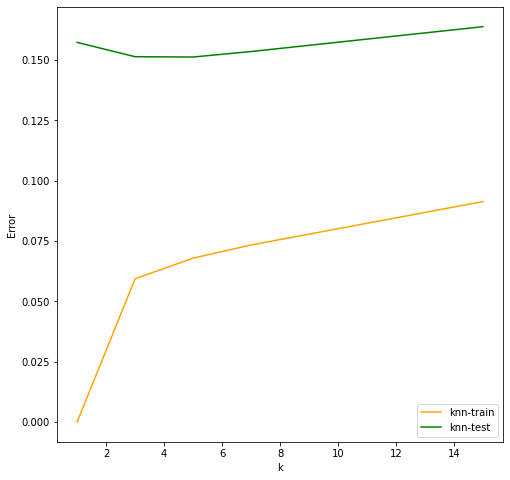

In [13]:
# kNN plotting
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)

train_stds, test_stds = knn_stds()
axes.plot(k_points, train_stds, '-', color = 'orange', label = 'knn-train')
axes.plot(k_points, test_stds, '-', color = 'green', label = 'knn-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)

print(regressor.intercept_)
print(regressor.coef_)

23.585842485148817
[-2.88861437e-01  5.93022626e-02  2.40565969e-02 -2.64356805e-02
  1.16775415e-02  3.74923660e-03 -3.79483192e-03 -3.58438231e-03
 -1.36610358e-02  2.42559422e-02 -5.71717440e-02  7.69621164e-02
 -9.82394663e-03  1.73586415e-01 -2.10862950e-01  2.12482973e+01
 -5.65358597e-02 -5.52421959e-02  9.90591256e-03 -3.08468051e-03
  3.68977893e-03 -1.20769789e-02  5.07032401e-02 -3.08258960e-02
 -1.08705270e-02 -1.53272874e-04  4.24856619e-02  3.74454934e-02
 -2.43014712e-02 -7.05475222e-03 -3.00281362e-01  8.52516002e-01
 -1.07893201e-02 -2.29830021e-02  2.88215942e-02  1.02645629e-02
 -4.10299809e-02  8.16360126e-03  1.56134600e-03 -2.09752763e-03
  1.84995187e-02  4.56621375e-03  1.44598363e-03 -2.67258325e-02
 -1.84425240e-02 -4.64405386e-02  8.35415899e-02  7.16212523e-02
 -1.41997042e-02 -2.60343856e-02  1.75116661e-02 -1.89609324e-02
  1.51404964e-02  1.39744306e-02 -2.50378615e-02  2.97363348e-02
 -1.80383524e-03 -4.10168208e-02  2.75701433e-02  4.68371565e-03
  6.67

In [15]:
y_pred = regressor.predict(test_x)
error_test = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
error_test

,Actual,Predicted
0,3.0,2.911691
1,2.0,2.052214
2,2.0,2.330412
3,3.0,2.845418
4,2.0,1.824298
...,...,...
359,2.0,7.964720
360,2.0,2.095073
361,3.0,3.044126
362,2.0,1.702357


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, y_pred))


Mean squared error: 0.15
Coefficient of determination: 0.39


In [17]:
import cv2
from imutils import paths
import os

Hg = 200
Lng = 80

imagePaths = list(paths.list_images('/content/drive/MyDrive/BD/Minimias/MIAS_Normal'))
data = []
labels = []
i = 0
for imagePath in imagePaths:
    i = i + 1
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (Hg, Lng))
    try:
      cv2.imwrite('/content/drive/MyDrive/BD/Minimias/MIAS_sa/{}mias.png'.format(i), image)
    except AttributeError:
      print("Not found {}".format(img))


In [18]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
  fileList = []
  print(myDir)
  for root, dirs, files in os.walk(myDir, topdown=False):
    for name in files:
      if name.endswith(format):
        fullName = os.path.join(root, name)
        fileList.append(fullName)
  return fileList

# load the original image
myFileList = createFileList('/content/drive/MyDrive/BD/Minimias/MIAS_sc')
y_label = []
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()
    y_label.append(1)

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscala
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("/content/drive/MyDrive/BD/Minimias_completo.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/BD/Minimias/MIAS_sc
/content/drive/MyDrive/BD/Minimias/MIAS_sc/1mias.png
[  0   0   0 ... 158 151 148]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/2mias.png
[214 213 212 ...   4  63 153]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/3mias.png
[206 208 210 ...   2   3   3]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/4mias.png
[208 210 212 ...   1   1   0]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/5mias.png
[0 0 0 ... 0 0 0]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/6mias.png
[ 9 10  5 ... 42 39 40]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/7mias.png
[216 212 211 ...  72 121   9]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/8mias.png
[  0   0   0 ... 132 135 136]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/9mias.png
[173 204 206 ...   5   4   5]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/10mias.png
[  7   6   7 ... 114 126 130]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/11mias.png
[ 0  0  0 ... 35 35 33]
/content/drive/MyDrive/BD/Minimias/MIAS_sc/12mias.png
[190 225 223

In [19]:
print(len(y_label))
read_file = pd.read_csv('/content/drive/MyDrive/BD/Minimias_completo.csv')
read_file.shape

109


(108, 16000)

In [20]:
myFileList = createFileList('/content/drive/MyDrive/BD/Minimias/MIAS_sa')

for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()
    y_label.append(0)

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscala
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("/content/drive/MyDrive/BD/Minimias_completo.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

/content/drive/MyDrive/BD/Minimias/MIAS_sa
/content/drive/MyDrive/BD/Minimias/MIAS_sa/1mias.png
[146 155 155 ...   0   0   1]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/2mias.png
[0 0 0 ... 0 0 0]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/3mias.png
[185 181 184 ...   0   0   0]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/4mias.png
[222 234 234 ...   7   6   6]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/5mias.png
[185   5   0 ...   0   0   0]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/6mias.png
[214 218 220 ...   0   0   0]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/7mias.png
[165 176 177 ...   6   6   5]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/8mias.png
[211 207 206 ... 254 253 254]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/9mias.png
[0 0 0 ... 0 0 0]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/10mias.png
[163 174 174 ...   0   0   0]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/11mias.png
[230 231 231 ... 229 233 235]
/content/drive/MyDrive/BD/Minimias/MIAS_sa/12mias.png
[203 213 212

In [21]:
del y_label[0]
print(len(y_label))
read_file = pd.read_csv('/content/drive/MyDrive/BD/Minimias_completo.csv')
read_file.shape

308


(308, 16000)

In [68]:
# split into train test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(read_file, y_label, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, len(y_train), len(y_test))



(206, 16000) (102, 16000) 206 102


In [87]:
# train-test split evaluation random forest on the housing dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import median_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('Median absolute error: ', median_absolute_error(y_test, yhat))
print('Intercept:', model.intercept_)

print('Top accuracy score: ', top_k_accuracy_score(y_test, yhat, k = 1))

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("MSE: %.2f" % mean_squared_error(y_test, yhat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, yhat))


MAE: 0.293
Median absolute error:  0.19757533060084728
Intercept: -0.09661527664603736
Top accuracy score:  0.5
Coefficients: 
 [-2.32337312e-05 -1.91269612e-05 -2.77320178e-05 ... -1.58754933e-05
 -5.66329235e-06  3.81247990e-05]
MSE: 0.18
Coefficient of determination: 0.19


In [97]:
k_list = [1, 3, 5, 7, 15]

rmse_val = [] #to store rmse values for different k
rmse_valtrain = []
for K in k_list:
    model = LinearRegression()

    model.fit(X_train, y_train)  #fit the model
    pred_train=model.predict(X_train) #make prediction on train set
    pred=model.predict(X_test) #make prediction on test set
    error_train = sqrt(mean_squared_error(y_train,pred_train)) #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    rmse_valtrain.append(error_train)
    print('RMSE value for train set k = ', K, 'is:', error_train)
    print('RMSE value fortest set k= ' , K , 'is:', error)
    print('\n')


RMSE value for train set k =  1 is: 4.736096545014288e-15
RMSE value fortest set k=  1 is: 0.42847795374644554


RMSE value for train set k =  3 is: 4.736096545014288e-15
RMSE value fortest set k=  3 is: 0.42847795374644554


RMSE value for train set k =  5 is: 4.736096545014288e-15
RMSE value fortest set k=  5 is: 0.42847795374644554


RMSE value for train set k =  7 is: 4.736096545014288e-15
RMSE value fortest set k=  7 is: 0.42847795374644554


RMSE value for train set k =  15 is: 4.736096545014288e-15
RMSE value fortest set k=  15 is: 0.42847795374644554




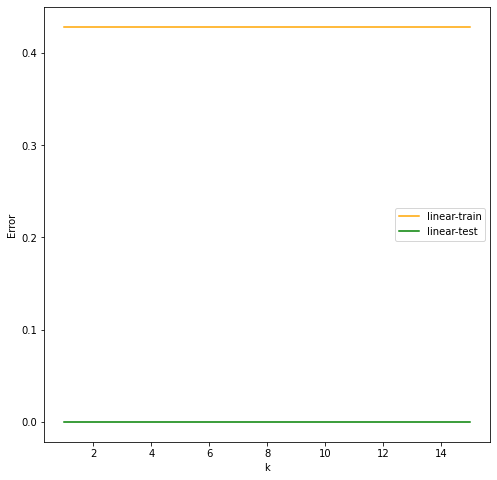

In [99]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)


axes.plot(k_points, rmse_val, '-', color = 'orange', label = 'linear-train')
axes.plot(k_points, rmse_valtrain, '-', color = 'green', label = 'linear-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()

In [49]:
class LinearRegression:
  def fit(self, X, y):
    X = np.c_[np.ones((len(X_train), 1)), X_train]
    self.beta = np.linalg.lstsq(X, y_train, rcond = None)[0]
    return self
    
  def predict(self, x):
    return np.dot(self.beta, np.r_[1, x])

model = LinearRegression().fit(X_train, y_train)
print("beta = ", model.beta)

beta =  [-1.40940379e-07 -2.84521863e-05 -2.14910657e-05 ... -1.70418136e-05
 -7.62846502e-06  3.65784435e-05]


In [92]:

#https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

k_list = [1, 3, 5, 7, 15]

rmse_val = [] #to store rmse values for different k
rmse_valtrain = []
for K in k_list:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred_train=model.predict(X_train) #make prediction on train set
    pred=model.predict(X_test) #make prediction on test set
    error_train = sqrt(mean_squared_error(y_train,pred_train)) #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    rmse_valtrain.append(error_train)
    print('RMSE value for train set k = ', K, 'is:', error_train)
    print('RMSE value fortest set k= ' , K , 'is:', error)
    print('\n')



RMSE value for train set k =  1 is: 0.0
RMSE value fortest set k=  1 is: 0.47485807993381707


RMSE value for train set k =  3 is: 0.25965706368739827
RMSE value fortest set k=  3 is: 0.3820595489065486


RMSE value for train set k =  5 is: 0.278344621207847
RMSE value fortest set k=  5 is: 0.3970479301337931


RMSE value for train set k =  7 is: 0.2893321566802438
RMSE value fortest set k=  7 is: 0.3878919747476473


RMSE value for train set k =  15 is: 0.3180306173478554
RMSE value fortest set k=  15 is: 0.3957838806397905




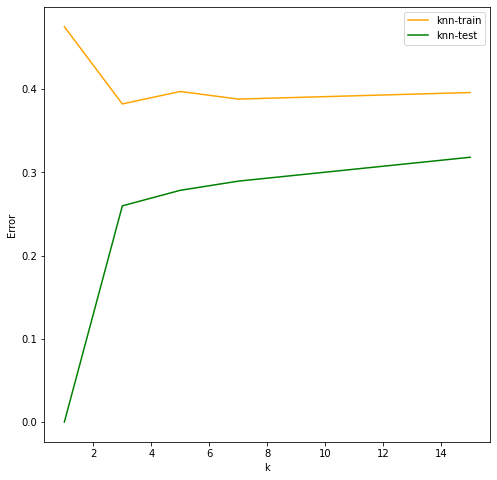

In [96]:


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)


axes.plot(k_points, rmse_val, '-', color = 'orange', label = 'knn-train')
axes.plot(k_points, rmse_valtrain, '-', color = 'green', label = 'knn-test')

axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
plt.show()